In [21]:
import numpy as np

In [22]:
class perceptron():
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self._w = rgen.normal(loc = 0, scale = 0.01, size = 1 + X.shape[1])
        self._error = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                #print(update)
                self._w[1:] += update * xi
                self._w[0] += update
                errors += int(update != 0.0)
            self._error.append(errors)
        return self
        
    def net_input(self, X):
        return np.dot(X, self._w[1:]) + self._w[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [23]:
import os
import pandas as pd

In [24]:
#Loading the iris dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None, encoding = 'utf-8')
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [25]:
import matplotlib.pyplot as plt
import numpy as np

In [26]:
%matplotlib inline

In [27]:
#selecting only two setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, -1)

In [28]:
# exctract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

In [29]:
print("Shape of X - ", X.shape)
print("Shape of Y - ", y.shape)

Shape of X -  (100, 2)
Shape of Y -  (100,)


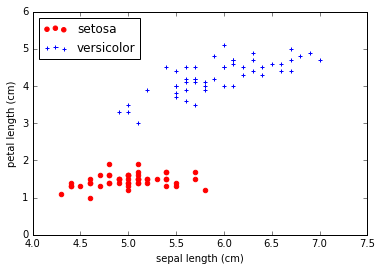

In [30]:
plt.scatter(X[:50, 0], X[:50,1],color ='red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100,1],color ='blue', marker = '+', label = 'versicolor')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.legend(loc = 'upper left')
plt.show()

We see that the two classes are linearly separable, hence we can use linear perceptron model for binary classification to plot the decision boundary separating the two classes

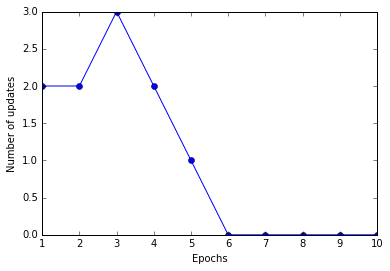

In [11]:
#training our model
#now we fit the model by feeding it the given data
ppn = perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn._error)+1), ppn._error, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [39]:
from matplotlib.colors import ListedColormap
def plotDecisionRegion(X, y, classifier, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1,X[:,0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1,X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max, resolution))
    #xx1, xx2 are the coordinates of x and y respectively, we pair each value of the two corresponding matrices and get a grid
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha = 0.3, cmap = cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x =X[y==c1,0],
                    y = X[y==c1,1],
                    alpha =0.8,
                    c = colors[idx],
                    marker = markers[idx],
                    label = c1, edgecolor='black')

In [37]:
#Learning by example the workings of plotDecisionBoundary function
a,b = np.meshgrid(np.linspace(0,4,5),np.linspace(0,4,5))
print("a - ",a)
print("b - ",b)
temp = np.array([a.ravel(),b.ravel()]).T
print("temp - ", temp)


a -  [[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]
b -  [[0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
temp -  [[0. 0.]
 [1. 0.]
 [2. 0.]
 [3. 0.]
 [4. 0.]
 [0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [0. 2.]
 [1. 2.]
 [2. 2.]
 [3. 2.]
 [4. 2.]
 [0. 3.]
 [1. 3.]
 [2. 3.]
 [3. 3.]
 [4. 3.]
 [0. 4.]
 [1. 4.]
 [2. 4.]
 [3. 4.]
 [4. 4.]]


C:\Users\ashish\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\ashish\AppData\Roaming\Python\Python35\site-packages\numpy\ma\core.py:6512: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


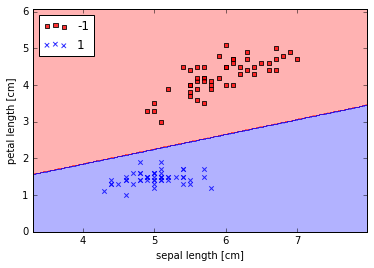

In [40]:
plotDecisionRegion(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

In [ ]:
plt.contourf()